# Flight 16 May 2019

In [1]:
from mgl_efis_plotter import *
import pandas as pd

In [2]:
flights = create_flights('IEFIS.REC', Config)
for i in range(0, len(flights)):
    print(i, flights[i])

0 Flight at 2019-05-02 09:06:33 to 2019-05-02 09:17:34,   3,139 messages
1 Flight at 2019-05-16 16:36:45 to 2019-05-16 17:40:16,   18,202 messages
2 Flight at 2019-05-02 09:06:31 to 2019-05-02 09:06:31,   7 messages


## Oil Problem

In [3]:
Config.rolling_window = 2
p = Plot(flights[1])

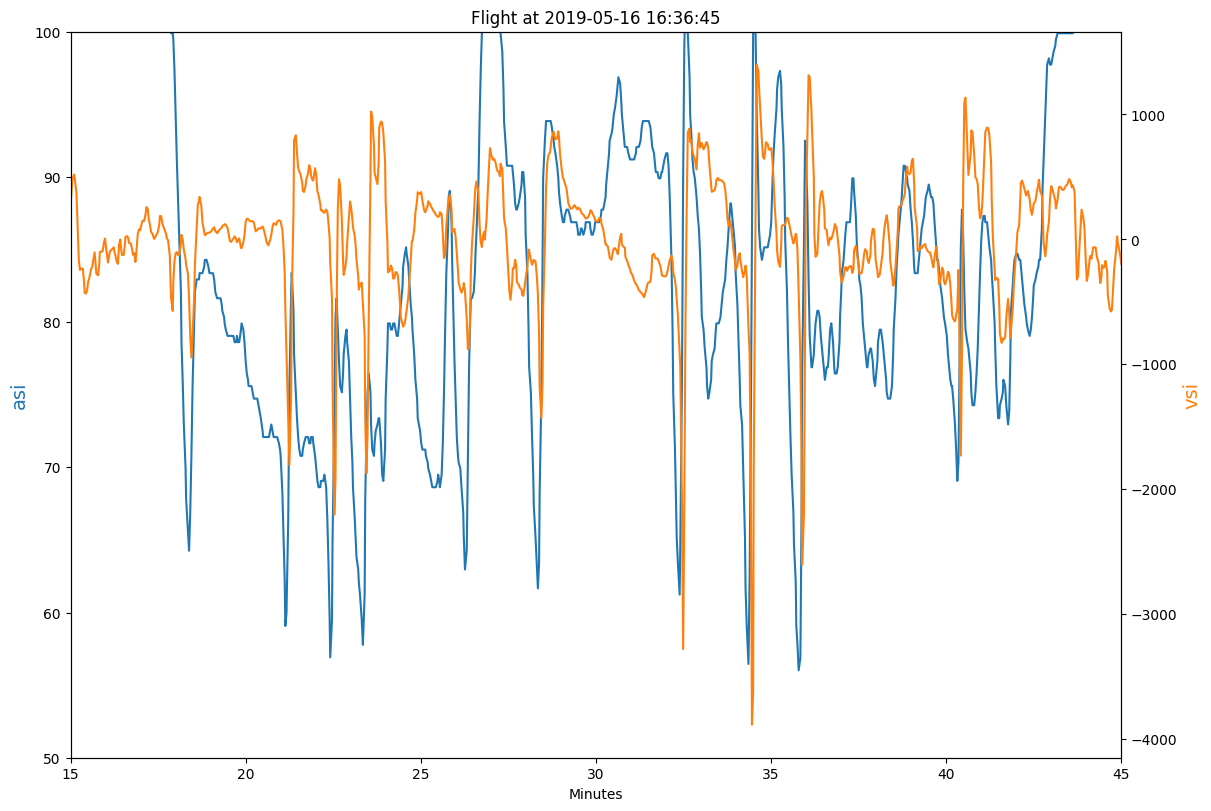

In [4]:
xlim = (15, 45)
ylim = (50, 100)
p.plot2(['asi', 'vsi'], xlim=xlim, ylim=ylim).show()

## Flaps Up Stalls

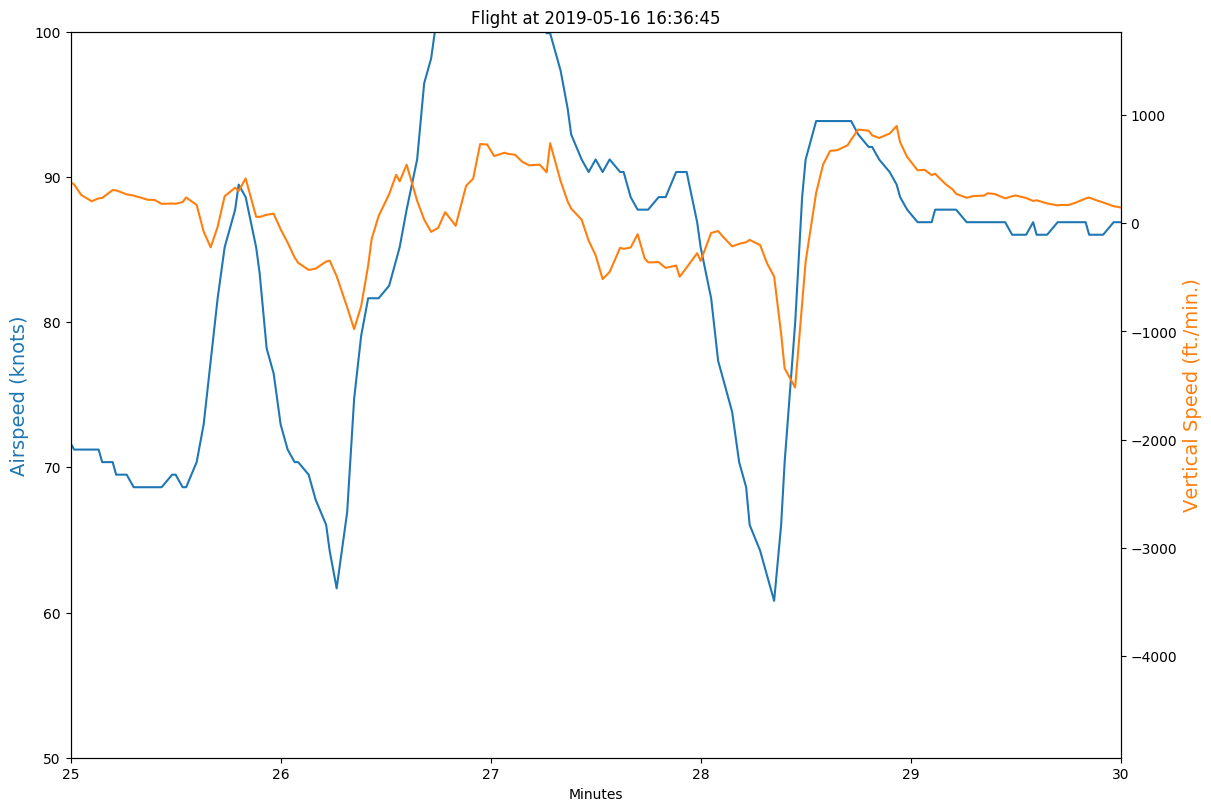

In [5]:
Config.rolling_window = 1
xlim = (25, 30)
ylim = (50, 100)
p.plot2(['asi', 'vsi'], ['Airspeed (knots)', 'Vertical Speed (ft./min.)'], xlim=xlim, ylim=ylim).\
    save('stall-flaps-up-2019-05-16.png')

## Flaps Down Stalls

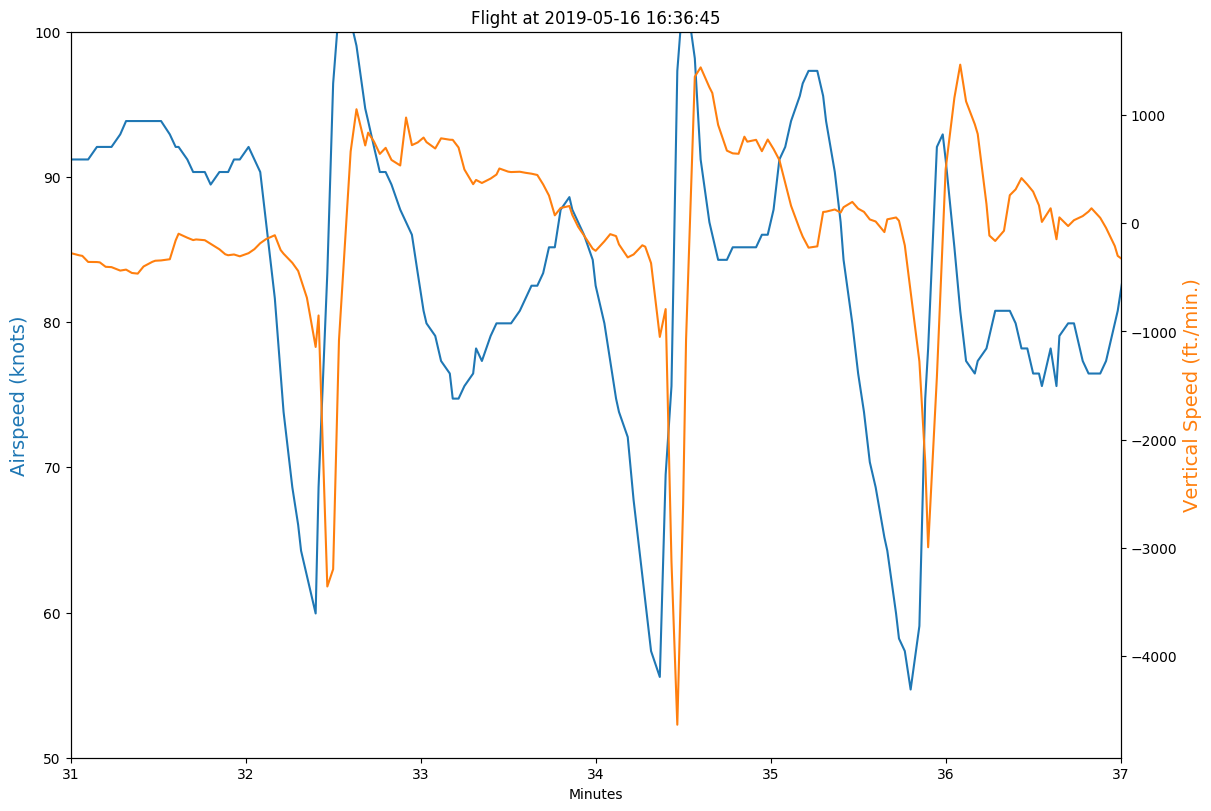

In [6]:
Config.rolling_window = 1
xlim = (31, 37)
ylim = (50, 100)
p.plot2(['asi', 'vsi'], ['Airspeed (knots)', 'Vertical Speed (ft./min.)'], xlim=xlim, ylim=ylim).\
    save('stall-flaps-down-2019-05-16.png')

## Stall Speed Calculations

In [7]:
asi_data = p.flight.list_data('asi')
asi = pd.DataFrame(asi_data, index=asi_data['minutes'], columns=['asi'])
print('flaps up stall  ', float(asi.loc[25:30].min()), 'kts')
print('flaps down stall', float(asi.loc[31:37].min()), 'kts')

flaps up stall   60.79913606911447 kts
flaps down stall 54.697624190064786 kts
